In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv("train_E1GspfA.csv")

In [3]:
test=pd.read_csv("test_6QvDdzb.csv")

In [4]:
ran=pd.read_csv("sample_4E0BhPN.csv")

In [5]:
train.shape,test.shape,ran.shape

((18247, 3), (7650, 2), (7650, 3))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [8]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d',errors='coerce')

train['date'].max(),train['date'].min()

(Timestamp('2021-02-28 00:00:00'), Timestamp('2018-08-18 00:00:00'))

In [9]:
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d',errors='coerce')

test['date'].max(),test['date'].min()

(Timestamp('2022-03-28 00:00:00'), Timestamp('2021-03-01 00:00:00'))

In [10]:
entry=train['date'].value_counts().to_dict()
train['entry'] = train['date'].map(entry)

# cant map so not using as feature

In [11]:
entry=test['date'].value_counts().to_dict()
test['entry'] = test['date'].map(entry)

In [12]:
train['Month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['day_week']=train['date'].dt.weekday
train['quarter']=train['date'].dt.quarter
train['week']=train['date'].dt.week
train['year']=train['date'].dt.year

C:\Users\DELL\AppData\Local\Temp/ipykernel_12740/2881175223.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['week']=train['date'].dt.week


In [13]:
test['Month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['day_week']=test['date'].dt.weekday
test['quarter']=test['date'].dt.quarter
test['week']=test['date'].dt.week
test['year']=test['date'].dt.year

C:\Users\DELL\AppData\Local\Temp/ipykernel_12740/511191263.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['week']=test['date'].dt.week


## Feature making


In [14]:
hm=train.groupby(['hour'])['demand'].mean().to_dict()
hs=train.groupby(['hour'])['demand'].std().to_dict()

train['hm']=train['hour'].map(hm)
test['hm']=test['hour'].map(hm)

train['hs']=train['hour'].map(hs)
test['hs']=test['hour'].map(hs)

In [15]:
mm=train.groupby(['Month'])['demand'].mean().to_dict()
ms=train.groupby(['Month'])['demand'].std().to_dict()

train['mm'] = train['Month'].map(mm)
train['ms'] = train['Month'].map(ms)

test['mm'] = test['Month'].map(mm)
test['ms'] = test['Month'].map(ms)

In [16]:
dm=train.groupby(['day'])['demand'].mean().to_dict()
ds=train.groupby(['day'])['demand'].std().to_dict()

train['dm'] = train['day'].map(dm)
train['ds'] = train['day'].map(ds)

test['dm'] = test['day'].map(dm)
test['ds'] = test['day'].map(ds)

In [77]:
wm=train.groupby(['week'])['demand'].mean().to_dict()
ws=train.groupby(['week'])['demand'].std().to_dict()

train['wm']=train['week'].map(wm)
test['wm']=test['week'].map(wm)

train['ws']=train['week'].map(ws)
test['ws']=test['week'].map(ws)

In [84]:
qm=train.groupby(['quarter'])['demand'].mean().to_dict()
qs=train.groupby(['quarter'])['demand'].std().to_dict()

train['qm']=train['quarter'].map(qm)
test['qm']=test['quarter'].map(qm)

train['qs']=train['quarter'].map(qs)
test['qs']=test['quarter'].map(qs)

In [86]:
dwm=train.groupby(['day_week'])['demand'].mean().to_dict()
dws=train.groupby(['day_week'])['demand'].std().to_dict()

train['dwm']=train['day_week'].map(dwm)
test['dwm']=test['day_week'].map(dwm)

train['dws']=train['day_week'].map(dws)
test['dws']=test['day_week'].map(dws)

In [170]:
hem=train.groupby(['hour'])['entry'].mean().to_dict()
hes=train.groupby(['hour'])['entry'].std().to_dict()

train['hem']=train['hour'].map(hem)
test['hem']=test['hour'].map(hem)

train['hes']=train['hour'].map(hes)
test['hes']=test['hour'].map(hes)

In [17]:
train.describe()

,hour,demand,entry,Month,day,day_week,quarter,week,year,hm,hs,mm,ms,dm,ds
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,20.676659,6.470324,15.782430,3.025867,2.501233,26.543706,2019.396997,73.991451,38.134046,73.991451,39.938372,73.991451,41.205150
std,6.544963,41.678988,2.201813,3.618189,8.772904,2.003638,1.167955,15.828694,0.810979,15.100602,7.529657,8.753737,8.149379,3.599753,5.400087
min,0.000000,1.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2018.000000,49.097633,28.839183,64.308677,32.966208,67.919540,33.456105
25%,8.000000,43.000000,20.000000,3.000000,8.000000,1.000000,1.000000,12.000000,2019.000000,59.585608,30.605050,67.603868,34.594835,71.407407,36.906114
50%,13.000000,71.000000,21.000000,7.000000,16.000000,3.000000,3.000000,27.000000,2019.000000,70.292824,35.864088,73.252600,38.470985,73.618033,39.254850
75%,18.000000,98.000000,22.000000,10.000000,23.000000,5.000000,4.000000,41.000000,2020.000000,90.743243,45.594312,76.014773,40.466455,76.203390,45.373722
max,23.000000,379.000000,24.000000,12.000000,31.000000,6.000000,4.000000,53.000000,2021.000000,94.625843,50.436993,96.076211,62.165739,80.541391,54.907973


In [18]:
x=train[train['hour']==0]

In [19]:
x['date'].dt.year.value_counts()

2019    298
2020    293
2018     83
2021     52
Name: date, dtype: int64

<AxesSubplot:>

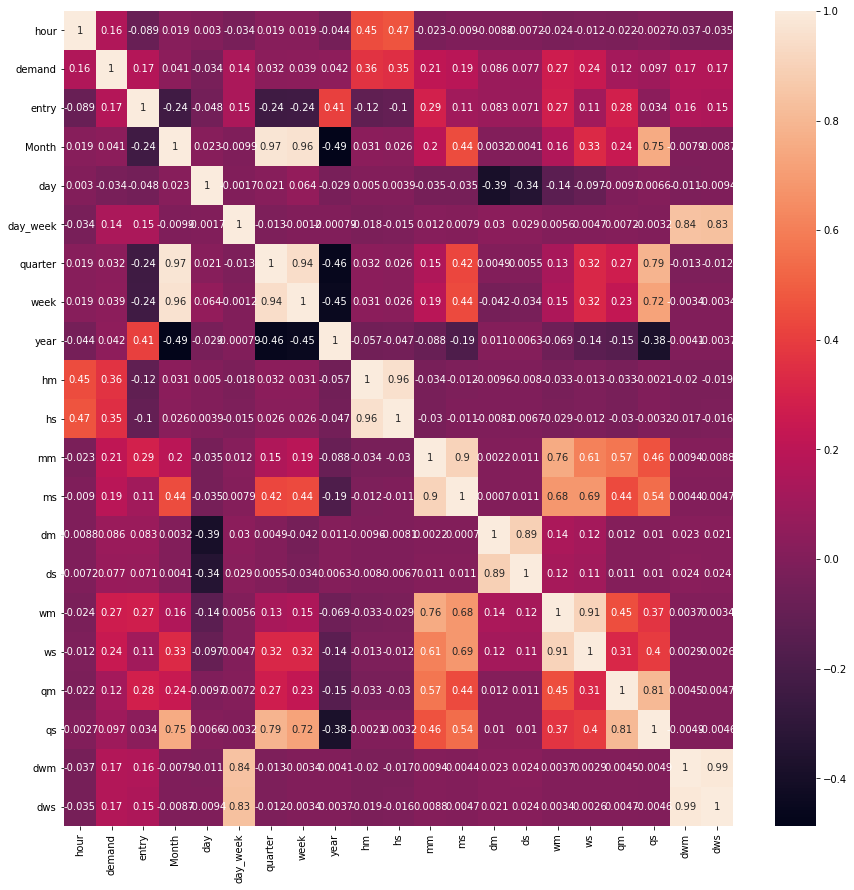

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [22]:
train.columns,test.columns

(Index(['date', 'hour', 'demand', 'entry', 'Month', 'day', 'day_week',
        'quarter', 'week', 'year', 'hm', 'hs', 'mm', 'ms', 'dm', 'ds'],
       dtype='object'),
 Index(['date', 'hour', 'entry', 'Month', 'day', 'day_week', 'quarter', 'week',
        'year', 'hm', 'hs', 'mm', 'ms', 'dm', 'ds'],
       dtype='object'))

In [23]:
X=train.drop(['demand','date'],axis=1)

In [24]:
y=train['demand']

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hour      18247 non-null  int64  
 1   entry     18247 non-null  int64  
 2   Month     18247 non-null  int64  
 3   day       18247 non-null  int64  
 4   day_week  18247 non-null  int64  
 5   quarter   18247 non-null  int64  
 6   week      18247 non-null  int64  
 7   year      18247 non-null  int64  
 8   hm        18247 non-null  float64
 9   hs        18247 non-null  float64
 10  mm        18247 non-null  float64
 11  ms        18247 non-null  float64
 12  dm        18247 non-null  float64
 13  ds        18247 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 1.9 MB


## Features

In [26]:
feats=['hour' ,
#        'entry', 
       'Month', 'day', 'day_week',#'year',
      'quarter', #'week',
       'hm','hs',#'dm','ds'
      ]

## Linear regression

## Decision tree

##  Random forest regressor

In [177]:
train.columns

Index(['date', 'hour', 'demand', 'entry', 'Month', 'day', 'day_week',
       'quarter', 'week', 'year', 'hm', 'hs', 'mm', 'ms', 'dm', 'ds', 'wm',
       'ws', 'qm', 'qs', 'dwm', 'dws', 'hem', 'hes'],
      dtype='object')

In [204]:
feats=['hour' ,
#        'entry', 
       'Month', 'day', 'day_week',#'year',
      'quarter', #'week',
       'hm','hs',#'dm','ds'
      ]

In [393]:
import lightgbm as lgb
# lgb_model = lgb.LGBMRegressor(max_depth=2,num_leaves = 3,n_estimators = 20)
# lgb_model = lgb.LGBMRegressor(objective='quantile',alpha=0.5)
lgb_model = lgb.LGBMRegressor(learning_rate=0.151,n_estimators=90)
lgb_model.fit(train[feats],y)

LGBMRegressor(learning_rate=0.151, n_estimators=90)

In [394]:
out=lgb_model.predict(test[feats])
test['demand']=out

In [395]:
y_pred_lgb=lgb_model.predict(train[feats])
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_lgb, y, squared=False)

30.662219153220732

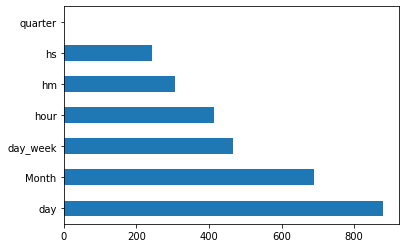

In [379]:
feat_importances = pd.Series(lgb_model.feature_importances_, index=train[feats].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [353]:
feat_importances.nlargest(15).index.to_list()

['day', 'Month', 'day_week', 'hour', 'hm', 'hs', 'quarter']

## Output

In [396]:
new=test[['date','hour','demand']]

new.to_csv('lgbmf1.csv',index=False)